# Analise de dados do Dataset Spotify 🎹

## Objetivo do projeto:🎯

Este notebook tem o objetivo criar um modelo de classificação de músicas para rotulá-las como lenta os agitada, utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.
O link para base de dados e mais detalhes se encontra em: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [4]:
# importando a biblioteca Pandas
import pandas as pd

In [5]:
# lendo o dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset.csv.zip')

In [6]:
# visualizando os dados
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# verificando as colunas
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [367]:
# criando a variável target
df['target'] = df['valence'].apply(lambda x: 'agitada' if x > 0.5 else 'lenta')

In [8]:
# criando um novo dataset com as colunas selecionadas
data = df.copy()
data = data.drop(['Unnamed: 0', 'track_id', 'album_name'], axis=1)

In [9]:
# verificando informações gerais do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   track_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

In [10]:
# checando itens faltantes
for col in data.columns.tolist():
    print(f'A coluna {col} tem {data[col].isnull().sum()} dados faltantes.')

A coluna artists tem 1 dados faltantes.
A coluna track_name tem 1 dados faltantes.
A coluna popularity tem 0 dados faltantes.
A coluna duration_ms tem 0 dados faltantes.
A coluna explicit tem 0 dados faltantes.
A coluna danceability tem 0 dados faltantes.
A coluna energy tem 0 dados faltantes.
A coluna key tem 0 dados faltantes.
A coluna loudness tem 0 dados faltantes.
A coluna mode tem 0 dados faltantes.
A coluna speechiness tem 0 dados faltantes.
A coluna acousticness tem 0 dados faltantes.
A coluna instrumentalness tem 0 dados faltantes.
A coluna liveness tem 0 dados faltantes.
A coluna valence tem 0 dados faltantes.
A coluna tempo tem 0 dados faltantes.
A coluna time_signature tem 0 dados faltantes.
A coluna track_genre tem 0 dados faltantes.


In [11]:
# eliminando a linha com dados faltantes
data.dropna(axis= 0, inplace=True)

# Verificando estatísticas gerais 📈
data.describe()

In [13]:
# Forma do dataset
data.shape

(113999, 18)

## Criando a variável target 🎯

Utilizaremos a coluna "valence" como target para definir a classificação. Músicas com mais valência tentem a ser mais positivas enquanto, músicas com menos valência tentem as serem mais negativas.

In [16]:
# importando bibliotecas de visualização
# !pip install matplotlib==3.7.3

In [17]:
import matplotlib.pyplot as plt

## Feature Engineering 🛠️

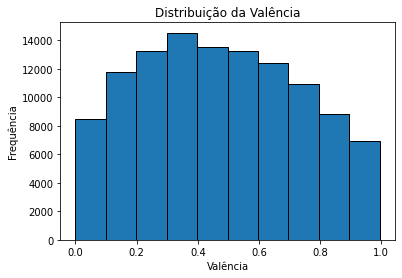

In [19]:
# visualizando a varável target
plt.figsize=(6, 6)

plt.hist(data= data, x='valence', bins=10, edgecolor='black')
plt.title('Distribuição da Valência')
plt.xlabel('Valência')
plt.ylabel('Frequência')
plt.show()

In [21]:
# Excluindo a coluna valence que originou o target
data.drop('valence', axis=1, inplace=True)

In [22]:
data.tail()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,track_genre,target
113995,Rainy Lullaby,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,125.995,5,world-music,lenta
113996,Rainy Lullaby,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,85.239,4,world-music,lenta
113997,Cesária Evora,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,132.378,4,world-music,agitada
113998,Michael W. Smith,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,135.960,4,world-music,lenta
113999,Cesária Evora,Barbincor,22,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,79.198,4,world-music,agitada


## Tratando variáveis categóricas 📘

LabelEncoder: Essa classe é utilizada para codificar rótulos de classes em números inteiros.

In [25]:
# criando lista com as colunas não numéricas
col_cat = [col for col in data.columns.tolist() if data[col].dtype == 'object' or data[col].dtype == 'bool']

In [26]:
col_cat

['artists', 'track_name', 'explicit', 'track_genre', 'target']

In [27]:
# função para tratar os dados categóricos e transformá-los em numéricos

def label_encoder_dataframe(df, columns_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print('A lista possui colunas que não existem no Dataframe.')

    return df

label_encoder_dataframe(data, col_cat)
data.head()


C:\Users\FamiliaSilva\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,track_genre,target
0,10357,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,87.917,4,0,0
1,3287,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,77.489,4,0,1
2,12397,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,76.332,4,0,1
3,14839,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,181.740,3,0,1
4,5255,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,119.949,4,0,1


## Analisando variáveis que vão compor nosso modelo 📊

In [29]:
import seaborn as sns

<Axes: >

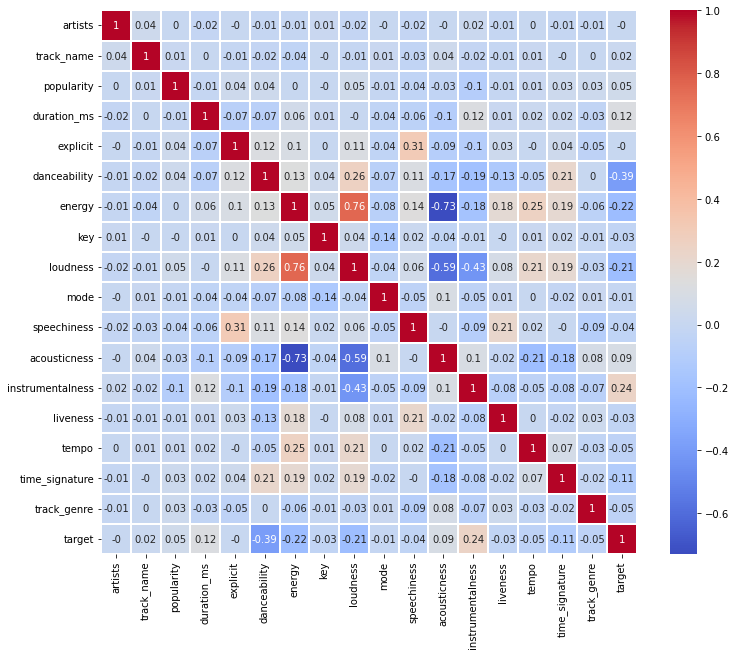

In [52]:
fig, ax = plt.subplots(figsize=(12, 10))

corr_data = data.corr().round(2)
sns.heatmap(data= corr_data, annot=True, linewidths=1.5, ax=ax, cmap="coolwarm")


## Análise Exploratória 📈

In [361]:
# verificando a distrubuição de valores na coluna target
round(data['target'].value_counts(normalize=True) * 100, 2)

1    54.25
0    45.75
Name: target, dtype: float64

In [369]:
set(df['target'])

{'agitada', 'lenta'}

In [365]:
set(data['target'])

{0, 1}

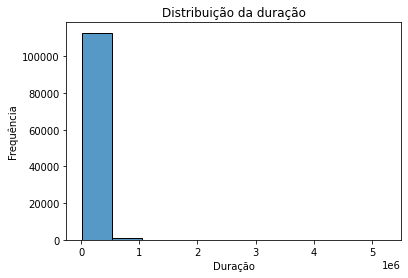

In [69]:
plt.figsize=(8, 6)

sns.histplot(data= data, x='duration_ms', bins=10)
plt.title('Distribuição da duração')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

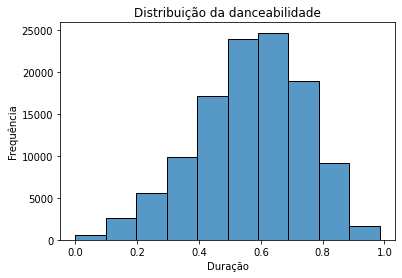

In [73]:
plt.figsize=(8, 6)

sns.histplot(data= data, x='danceability', bins=10)
plt.title('Distribuição da danceabilidade')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

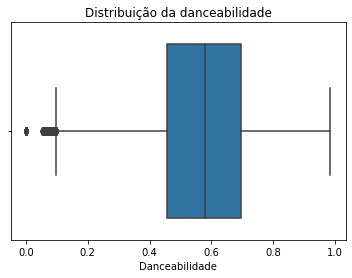

In [81]:
plt.figsize=(8, 6)

sns.boxplot(data= data, x='danceability')
plt.title('Distribuição da danceabilidade')
plt.xlabel('Danceabilidade')

plt.show()

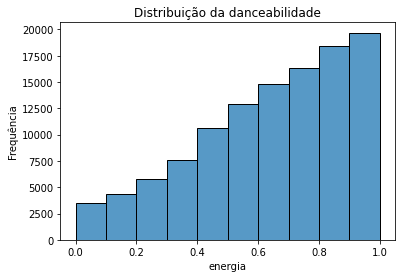

In [85]:
plt.figsize=(8, 6)

sns.histplot(data= data, x='energy', bins=10)
plt.title('Distribuição da danceabilidade')
plt.xlabel('energy')
plt.ylabel('Frequência')
plt.show()

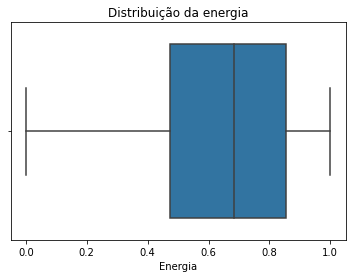

In [89]:
plt.figsize=(8, 6)

sns.boxplot(data= data, x='energy')
plt.title('Distribuição da energia')
plt.xlabel('Energia')

plt.show()

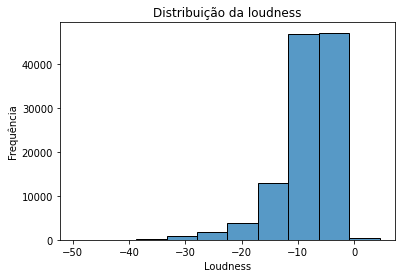

In [99]:
plt.figsize=(8, 6)

sns.histplot(data= data, x='loudness', bins=10)
plt.title('Distribuição da loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequência')
plt.show()

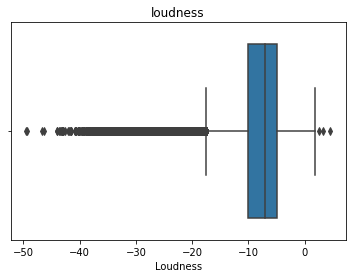

In [105]:
plt.figsize=(8, 6)

sns.boxplot(data= data, x='loudness')
plt.title('loudness')
plt.xlabel('Loudness')

plt.show()

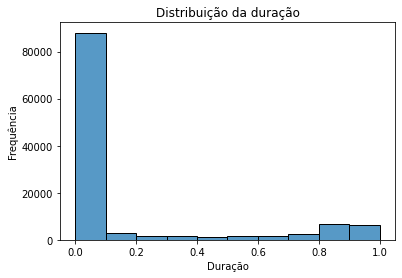

In [107]:
plt.figsize=(8, 6)

sns.histplot(data= data, x='instrumentalness', bins=10)
plt.title('Distribuição da duração')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

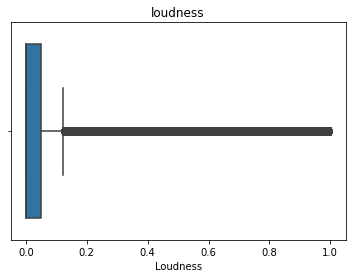

In [111]:
plt.figsize=(8, 6)

sns.boxplot(data= data, x='instrumentalness')
plt.title('loudness')
plt.xlabel('Loudness')

plt.show()

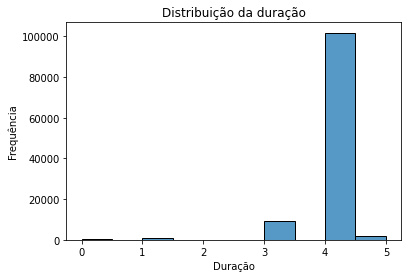

In [119]:
plt.figsize=(8, 6)

sns.histplot(data= data, x='time_signature', bins=10)
plt.title('Distribuição da duração')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

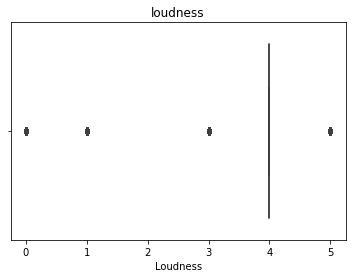

In [121]:
plt.figsize=(8, 6)

sns.boxplot(data= data, x='time_signature')
plt.title('loudness')
plt.xlabel('Loudness')

plt.show()

## Separando o Dataset em treino e teste 🎾

In [321]:
# Colunas selecionadas no modelo
col_model = ['duration_ms', 'danceability', 'energy', 'loudness', 'instrumentalness', 'time_signature', 'track_genre']

In [323]:
X = data[col_model]

In [325]:
y = data['target'].copy()

In [327]:
# Separando o dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)

In [329]:
print(X_train.shape, X_test.shape)

(91199, 7) (22800, 7)


## Normalizando os dados 📏

In [343]:
# normalizando os dados numéricos
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(X_train)

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

## Criando função para executar modelos de ML 🚀

In [295]:
def roda_modelo(modelo):
    from sklearn.metrics import roc_curve, roc_auc_score, classification_report, plot_confusion_matrix

    # treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)


    # Calculando probabilidade
    prob_predict = modelo.predict_proba(X_test_escalonado)
    auc = roc_auc_score(y_test, prob_predict[:,1])
    print(f'AUC {auc}')

    predicao = modelo.predict(X_test_escalonado)
    print('\nClassification Report')
    print(classification_report(y_test, predicao))

    print('\nCurve Roc')
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    auc = roc_auc_score(y_test, y_pred_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'Roc curve (AUC= {auc:.2f})')

    print('\nMatrix de Confusão')
    conf_matrix = confusion_matrix(y_test, predicao)
    print(conf_matrix)

## Regressão Logistica

AUC 0.784403379034577

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     10430
           1       0.74      0.74      0.74     12370

    accuracy                           0.71     22800
   macro avg       0.71      0.71      0.71     22800
weighted avg       0.71      0.71      0.71     22800


Curve Roc

Matrix de Confusão
[[7183 3247]
 [3269 9101]]


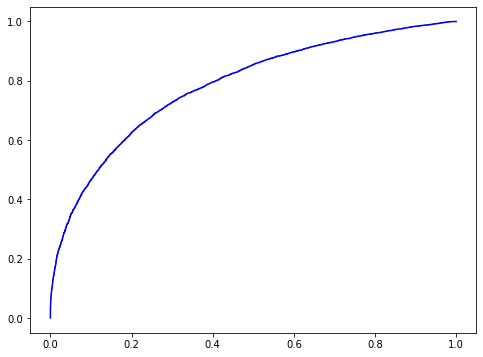

In [333]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

## KNN k-Nearest Neighbors

AUC 0.806883395559262

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     10430
           1       0.76      0.78      0.77     12370

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Curve Roc

Matrix de Confusão
[[7460 2970]
 [2771 9599]]


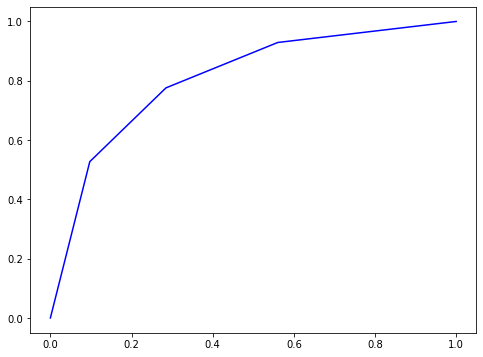

In [335]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

## Random Florest

AUC 0.8942770295250858

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79     10430
           1       0.82      0.83      0.83     12370

    accuracy                           0.81     22800
   macro avg       0.81      0.81      0.81     22800
weighted avg       0.81      0.81      0.81     22800


Curve Roc

Matrix de Confusão
[[ 8194  2236]
 [ 2091 10279]]


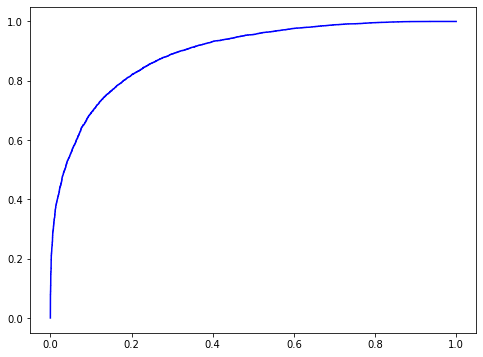

In [308]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=70, n_estimators=400, max_features='auto', min_samples_leaf= 4,
 min_samples_split= 10, bootstrap=True)
roda_modelo(modelo_random_forest)

## Grid Search 📖

Grid Search é uma abordagem sistemática para encontrar a melhor combinação de hiperparâmetros em modelos de machine learning.

In [310]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [60, 70, 80], 'n_estimators': [300, 400, 500], 'min_samples_leaf':[4, 5, 6], 'min_samples_split': [8, 10, 12]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print(f'melhores hiperparamegtros, {rf_params}')



melhores hiperparamegtros, {'max_depth': 60, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 400}


### Modelo com os parâmetros encontrados

AUC 0.8979990947076828

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     10430
           1       0.83      0.83      0.83     12370

    accuracy                           0.81     22800
   macro avg       0.81      0.81      0.81     22800
weighted avg       0.81      0.81      0.81     22800


Curve Roc

Matrix de Confusão
[[ 8254  2176]
 [ 2064 10306]]


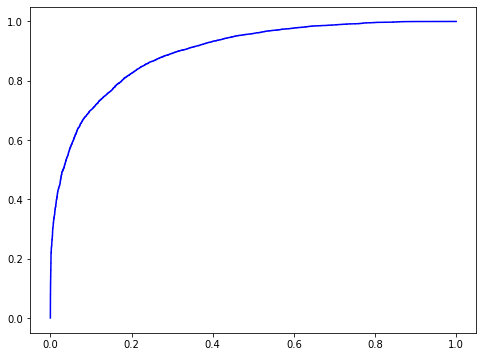

In [337]:
random_forest_classifier_gs = RandomForestClassifier(max_depth= 60, n_estimators= 400, min_samples_leaf= 4, min_samples_split= 8, random_state=42)
roda_modelo(random_forest_classifier_gs)

## Testando o modelo 🫣

In [347]:
import numpy as np

novos_dados = pd.read_excel('novos_dados.xlsx')
base_original = pd.read_excel('novos_dados.xlsx')

# criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

previsoes = random_forest_classifier_gs.predict(novos_dados)

# obtendo previsoes
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecidos')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()



,duration_ms,danceability,energy,loudness,instrumentalness,time_signature,track_genre,target
0,200000,0.89,0.8,-19333,0.976,4,rock,Música agitada
1,205000,0.20,0.5,-11773,0.452,3,folk,Música lenta
